# **Task 1 : TITANIC SURVIVAL PREDICTION**

In [2]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
import warnings

In [4]:
def warn(*args,**kwargs):
    pass
warnings.warn=warn

In [7]:
titanic = pd.read_csv("/content/Titanic-Dataset.csv")

In [8]:
columns=titanic.columns.to_list()
print(columns)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [10]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [11]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [15]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [16]:
titanic['Fare_Category'] = pd.cut(titanic['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid','High_Mid','High'])
titanic['Fare_Category'].value_counts()

High_Mid    236
Mid         217
Low         208
High        177
Name: Fare_Category, dtype: int64

In [17]:
pd.crosstab(titanic['Fare_Category'],titanic['Survived'])

Survived,0,1
Fare_Category,,
Low,165,43
Mid,150,67
High_Mid,134,102
High,76,101


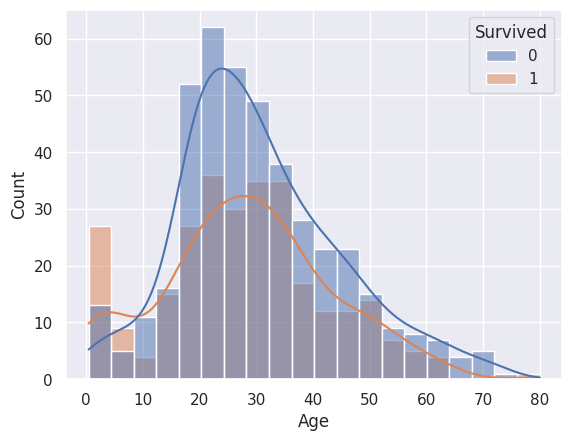

In [18]:
#Age Distribution by Survival:
sns.histplot(x='Age',hue='Survived',data=titanic,kde=True)
plt.show()

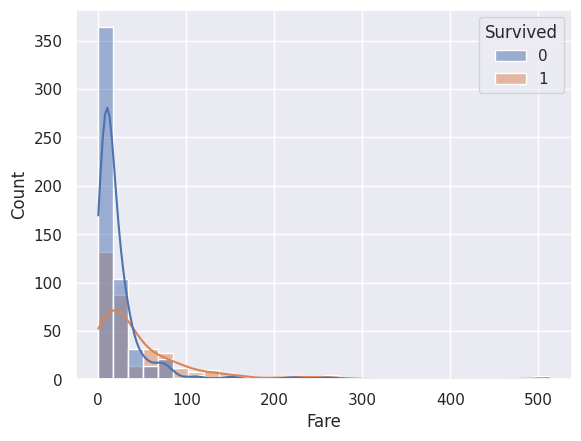

In [19]:
# Fare Distribution by Survival:
sns.histplot(x='Fare',hue='Survived',data=titanic,kde=True,bins=30)
plt.show()

<Figure size 1000x800 with 0 Axes>

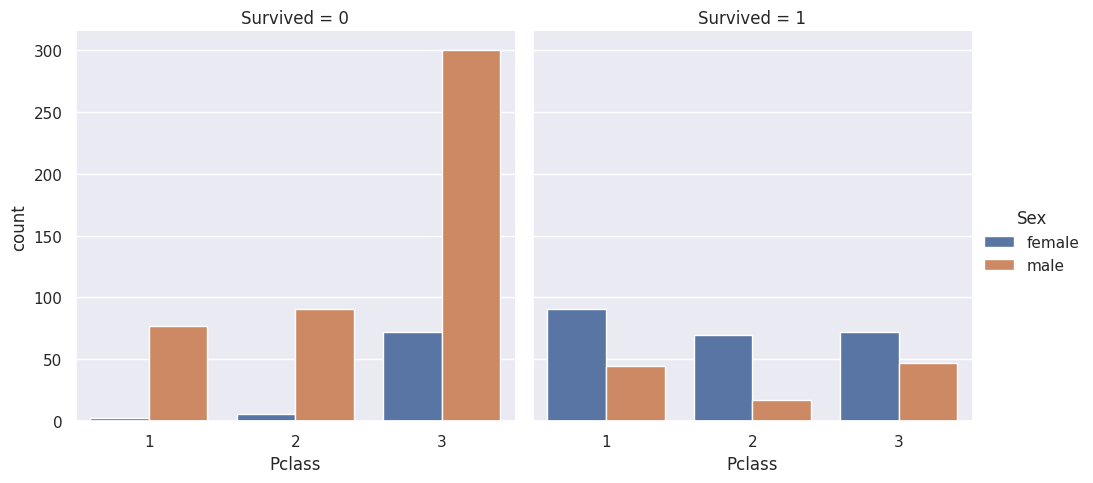

In [20]:
#Survival by Pclass and Sex:
plt.figure(figsize=(10,8))
sns.catplot(x='Pclass',hue='Sex',col='Survived',kind='count',data=titanic)
plt.show()

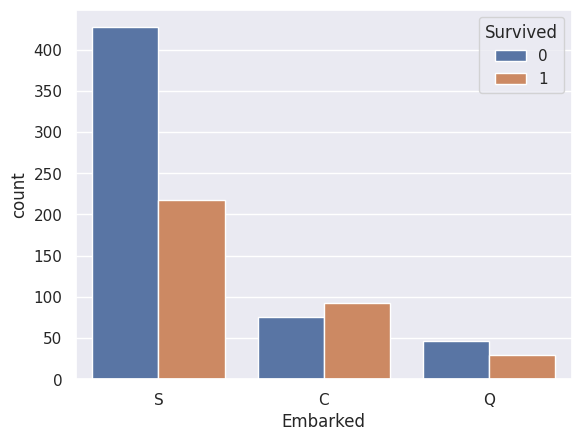

In [21]:
#Survival by Embarked Location:
sns.countplot(x='Embarked',hue='Survived',data=titanic)
plt.show()

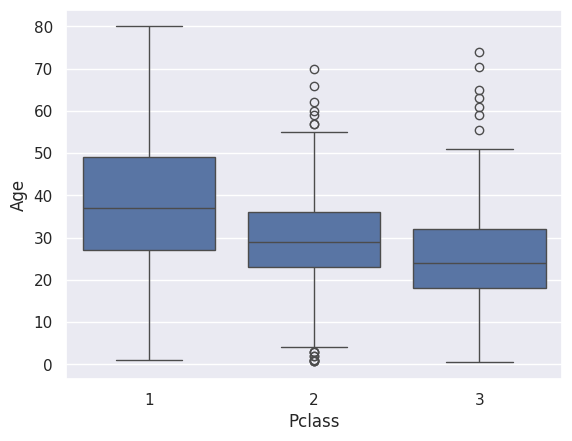

In [22]:
# Boxplot of Age by Pclass:
sns.boxplot(x='Pclass',y='Age',data=titanic)
plt.show()

In [23]:
titanic.drop('Fare_Category',axis=1,inplace=True)

In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
titanic.Embarked.fillna(titanic.Embarked.mode()[0],inplace=True)

In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
titanic.Cabin.fillna('NA',inplace=True)

In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
titanic.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [30]:
titanic['Salutation']=titanic.Name.apply(lambda name:name.split(',')[1].split('.')[0].strip())

In [31]:
# Handling missing values in Age with median
titanic['Age'] = titanic.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# If there are any remaining missing values in 'Age', fill them with the overall median
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

In [32]:
# Creating Age group column for analysis
titanic['Age_group']=pd.cut(titanic['Age'],bins=[0,18,35,50,100],labels=['0-18','19-35','36-50','51+'])

In [33]:
# Creating Family size column for analysis
titanic['Family_Size']=titanic['SibSp']+titanic['Parch']+1

In [34]:
titanic.Family_Size.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_Size, dtype: int64

In [35]:
# creating Fare range column for analysis
titanic['Fare_range']=pd.qcut(titanic['Fare'],q=4,labels=['Low','Medium','High','Veryhigh'])

In [36]:
titanic['Fare_range']

0           Low
1      Veryhigh
2        Medium
3      Veryhigh
4        Medium
         ...   
886      Medium
887        High
888        High
889        High
890         Low
Name: Fare_range, Length: 891, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Veryhigh']

In [37]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Age_group,Family_Size,Fare_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,Mr,19-35,2,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,36-50,2,Veryhigh
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,Miss,19-35,1,Medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,19-35,2,Veryhigh
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,Mr,19-35,1,Medium


In [38]:
print(titanic['Salutation'].unique().tolist())

['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']


In [39]:
# Mapping dictionary for title combinations
title_mapping = {
    'Mme': 'Mrs',
    'Ms': 'Mrs',
    'Mlle': 'Miss',
    'Dr': 'Officer',
    'Rev': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Capt': 'Officer',
    'Don': 'Noble',
    'Sir': 'Noble',
    'Lady': 'Noble',
    'the Countess': 'Noble',
    'Jonkheer': 'Noble'
}

In [40]:
titanic['Salutation']=titanic['Salutation'].map(title_mapping).fillna(titanic['Salutation'])

In [41]:
# Creating Cabin and Nocabin information for analysis
titanic['HasCabin']=titanic['Cabin'].apply(lambda x: 0 if x=='NA' else 1)

In [42]:
columns=titanic.columns.to_list()
print(columns)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Salutation', 'Age_group', 'Family_Size', 'Fare_range', 'HasCabin']


In [43]:
titanic.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

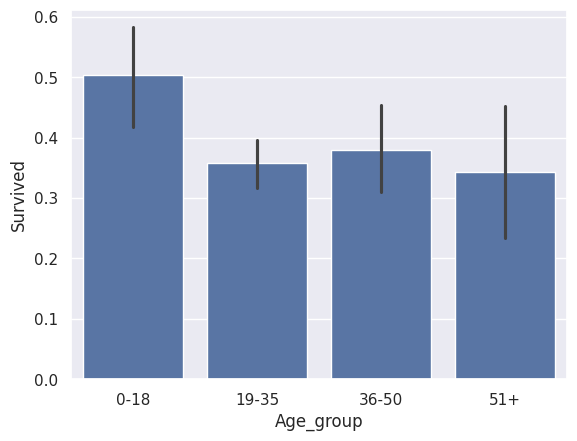

In [44]:
#Survival Rate by Age Groups:
sns.barplot(x='Age_group',y='Survived',data=titanic)
plt.show()

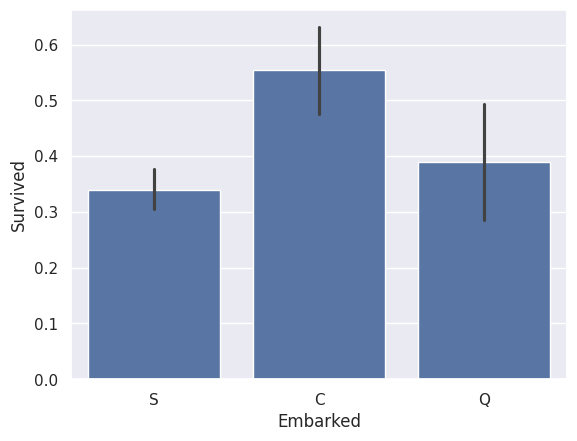

In [45]:
#Survival Rate by Embarked Location:
sns.barplot(x='Embarked',y='Survived',data=titanic)
plt.show()

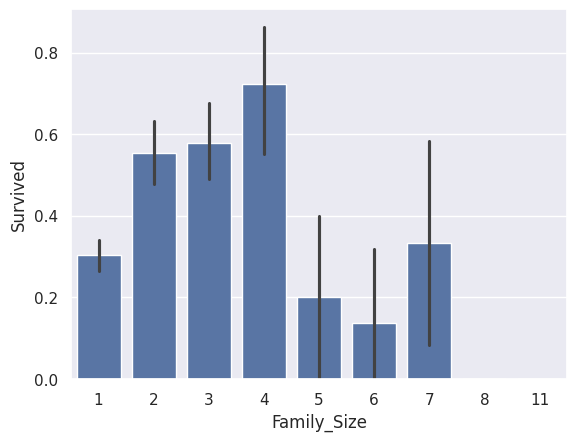

In [46]:
#Survival Rate by Sibling/Spouse (SibSp) and Parent/Child (Parch) Counts:
sns.barplot(x='Family_Size',y='Survived',data=titanic)
plt.show()

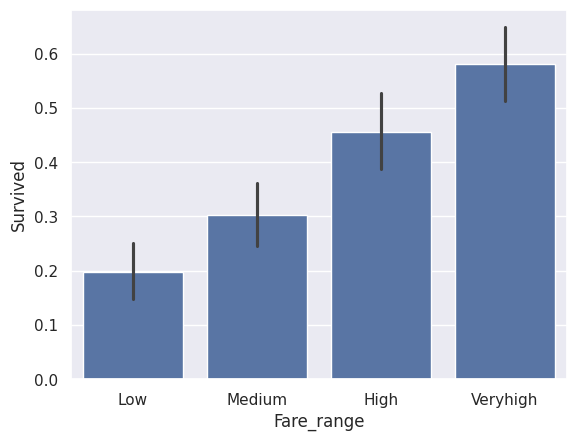

In [47]:
# Survival Rate by Fare Range:
sns.barplot(x="Fare_range",y="Survived",data=titanic)
plt.show()

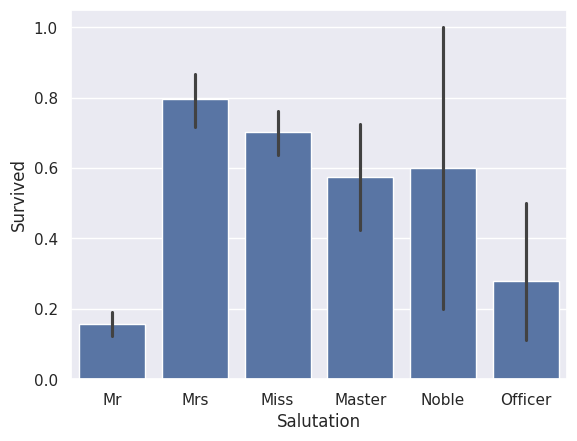

In [48]:
#Survival Rate by Title (extracted from Name):
sns.barplot(x='Salutation',y='Survived',data=titanic)
plt.show()

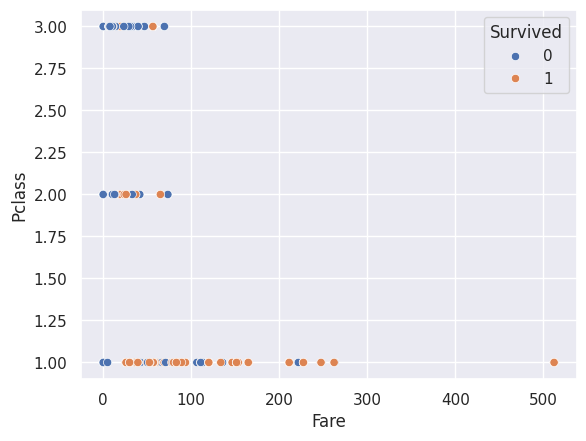

In [49]:
# Survival Rate by Ticket Class and Fare:
sns.scatterplot(x='Fare',y='Pclass',hue='Survived',data=titanic)
plt.show()

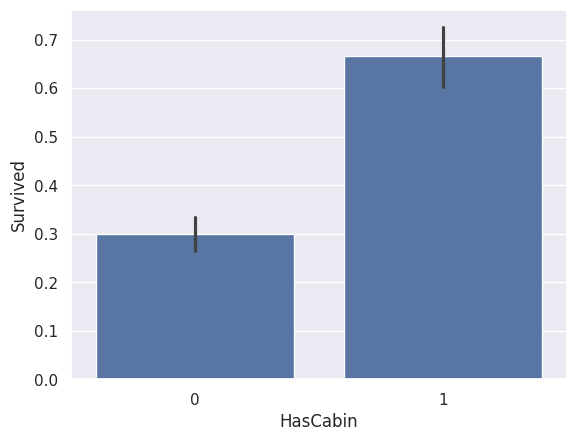

In [50]:
# Survival Rate by Cabin vs. No Cabin:
sns.barplot(x='HasCabin',y='Survived',data=titanic)
plt.show()